<header style="width:100%;position:relative">
  <div style="width:80%;float:right;">
    <h1>Guided SPARQL practice - BDNR 2023</h1>
    <h3>Department of Telematic Engineering Systems</h3>
    <h5>Universidad Politécnica de Madrid</h5>
  </div>
        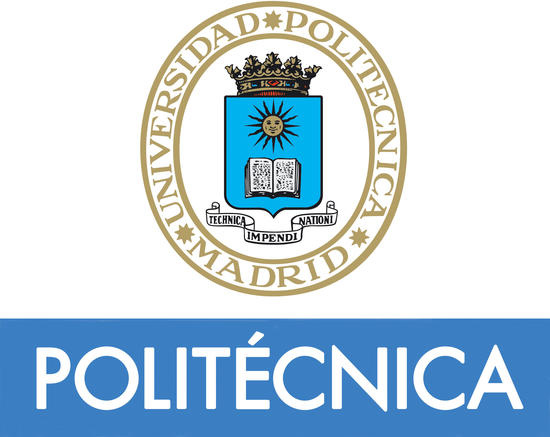
</header>

## Objectives

* Applying the concepts covered in class by solving a set of problems of increasing difficulty
* Learning two new SPARQL keywords very similar to those covered in class
* Evaluating your ability to apply SPARQL concepts in more challenging problems (advanced/optional exercises) 

## Instructions

We will be using a semantic server, which exposes a SPARQL endpoint at: http://fuseki.gsi.upm.es/sitc.

This server contains a dataset about [Beatles songs](http://www.snee.com/bobdc.blog/2017/11/sparql-queries-of-beatles-reco.html), which we will query with SPARQL.

We will provide you some example code to get you started, the *question* you will have to answer using SPARQL, and a template for the answer.

After each query, you will find some python code to test the results of the query.
**Make sure you've run the tests before moving to the next exercise**.
If the test gives you an error, you've probably done something wrong.
You do not need to understand or modify the test code.

For convenience, the examples in the notebook are executable (using the `%%sparql` magic command), and they are accompanied by some code to test the results.
If the tests pass, you probably got the answer right.

**Run this line to enable the `%%sparql` magic command.**

In [1]:
from helpers import sparql, solution, show_photos

The `%%sparql` magic command will allow us to use SPARQL inside normal jupyter cells.

For instance, the following code:

```python 
%%sparql http://dbpedia.org/sparql

<MY QUERY>
```    

Is the same as `run_query('<MY QUERY>', endpoint='http://dbpedia.org/sparql')` plus some additional steps, such as saving the results in a nice table format so that they can be used later and storing the results in a variable (`solution()`), which we will use in our tests.

You do not need to worry about it, and **you can always use one of the suggested online editors if you wish (see Tools)**.

Once you've answered all the questions, save the notebook and submit it to the corresponding task in Moodle.

## Tools

This guided practice will focus on this notebook, and will require that you execute your SPARQL queries in a cell.

However, you may use other external interfaces or editors to compose and execute your queries. Simply copy/paste the queries in this notebook to the external editor and be sure to copy it back to the cell to test it. Some of these external SPARQL editors are:

* YASGUI-GSI http://yasgui.gsi.upm.es
* DBpedia virtuoso http://dbpedia.org/sparql

Using the YASGUI-GSI editor has several advantages over other options.
It features:

* Selection of data source, either by specifying the URL or by selecting from a dropdown menu
* Interactive query editing
    * A set of pre-defined queries
    * Syntax errors
    * Auto-complete
* Data visualization
    * Total number of results
    * Different formats (table, pivot table, raw response, etc.)
    * Pagination of results
    * Search and filter results

## Exercises

The following exercises cover the basics of SPARQL with simple use cases.

#### First select - Exploring the dataset



Let's start with a simple query to explore the dataset using SPARQL.
We will get a list of the types of entities in the dataset.

SPARQL syntax is similar to SQL, mixed with turtle.
A SPARQL query has two main parts: the `SELECT` block, which specifies what variables we want to get; and the `WHERE` block which, loosely speaking, defines how the variables will be obtained from the graph.

In order to construct the `WHERE` block, we have to know the data we want to extract would be represented in Turtle.

In particular, to write an entity and its type, we would write this triple:

```turtle
<my_entity> a <type> .
```

For example:

```turtle
example:Timmy a example:Boy
```

In SPARQL, the parts that we wish to extract are replaced with a variable (e.g. `?name`, `?type`).
Hence, we would have something like this:

```turtle
?entity a ?type
```

The name of the variable has no effect on the query, but you should use a sensible name.
In these notebooks, try to use the names provided in the templates, because they might be used in the tests.

There are additional parts in the query.
For now, we will only cover the `LIMIT` statement, which limits the number of results we will get.
Using `LIMIT` is usually a good idea, especially when trying new queries, because the dataset may be too big. 

Using all these concepts, we will run our first query, to get the list of entities and their type:

In [2]:
%%sparql http://fuseki.gsi.upm.es/sitc/

SELECT ?entity ?type 
WHERE {
    ?entity a ?type
}
LIMIT 10

entity,type
http://learningsparql.com/ns/musician/RaymondBrown,http://learningsparql.com/ns/schema/Musician
http://learningsparql.com/ns/musician/PaulMcCartney,http://learningsparql.com/ns/schema/Musician
http://learningsparql.com/ns/musician/PeteBest,http://learningsparql.com/ns/schema/Musician
http://learningsparql.com/ns/musician/GeorgeHarrison,http://learningsparql.com/ns/schema/Musician
http://learningsparql.com/ns/musician/JohnLennon,http://learningsparql.com/ns/schema/Musician
http://learningsparql.com/ns/musician/RingoStarr,http://learningsparql.com/ns/schema/Musician
http://learningsparql.com/ns/musician/KeithMoon,http://learningsparql.com/ns/schema/Musician
http://learningsparql.com/ns/musician/TonySheridan,http://learningsparql.com/ns/schema/Musician
http://learningsparql.com/ns/musician/GeorgeMartin,http://learningsparql.com/ns/schema/Musician
http://learningsparql.com/ns/musician/DennisMcConnell,http://learningsparql.com/ns/schema/Musician


You can check that the results you got match our expectations:

In [3]:
assert len(solution()['tuples']) == 10  # Make sure we got 10 results 
assert len(solution()['columns']) >= 1  # In 2 columns (?entity and ?type)

Now, use the same concepts to write a query that gets the **list of entities (subjects) and their properties (predicates)**.

**Hint**: review the previous query. In there, we fixed a property (`a`, i.e. `rdfs:type`) and used a variable for the objects. Now we are insterested properties, regardless of the value (object).

In [4]:
%%sparql http://fuseki.gsi.upm.es/sitc/

SELECT ?entity ?p
WHERE {
    ?entity a ?p
}
LIMIT 100

entity,p
http://learningsparql.com/ns/musician/RaymondBrown,http://learningsparql.com/ns/schema/Musician
http://learningsparql.com/ns/musician/PaulMcCartney,http://learningsparql.com/ns/schema/Musician
http://learningsparql.com/ns/musician/PeteBest,http://learningsparql.com/ns/schema/Musician
http://learningsparql.com/ns/musician/GeorgeHarrison,http://learningsparql.com/ns/schema/Musician
http://learningsparql.com/ns/musician/JohnLennon,http://learningsparql.com/ns/schema/Musician
http://learningsparql.com/ns/musician/RingoStarr,http://learningsparql.com/ns/schema/Musician
http://learningsparql.com/ns/musician/KeithMoon,http://learningsparql.com/ns/schema/Musician
http://learningsparql.com/ns/musician/TonySheridan,http://learningsparql.com/ns/schema/Musician
http://learningsparql.com/ns/musician/GeorgeMartin,http://learningsparql.com/ns/schema/Musician
http://learningsparql.com/ns/musician/DennisMcConnell,http://learningsparql.com/ns/schema/Musician


In [5]:
s = solution()
assert len(s['tuples']) >= 100  # There are at least 100 results
assert 'entity' in s['columns']  # A column named entity exists
assert 'http://learningsparql.com/ns/musician/RaymondBrown' in s['columns']['entity'] # RaymondBrown is an entity

### Getting a list of DISTINCT types

To get a better grip of the dataset, we will get a list of types.

We may try to do so with a simple query: 

In [6]:
%%sparql http://fuseki.gsi.upm.es/sitc/

SELECT ?type
WHERE {
    ?entity a ?type
}
LIMIT 10

type
http://learningsparql.com/ns/schema/Musician
http://learningsparql.com/ns/schema/Musician
http://learningsparql.com/ns/schema/Musician
http://learningsparql.com/ns/schema/Musician
http://learningsparql.com/ns/schema/Musician
http://learningsparql.com/ns/schema/Musician
http://learningsparql.com/ns/schema/Musician
http://learningsparql.com/ns/schema/Musician
http://learningsparql.com/ns/schema/Musician
http://learningsparql.com/ns/schema/Musician


However, this list has many duplicates.
In fact, we only get one type (`Musician`).

To remove duplicates, we will need the `DISTINCT` statement, which only shows unique (distinct) rows:

In [7]:
%%sparql http://fuseki.gsi.upm.es/sitc/

SELECT DISTINCT ?type
WHERE {
    ?entity a ?type
}
LIMIT 100

type
http://learningsparql.com/ns/schema/Musician
http://learningsparql.com/ns/schema/Song
http://learningsparql.com/ns/schema/Instrument


We should see only three types now (`Musician`, `Song`, and `Instrument`).

In [8]:
assert 'type' in solution()['columns']
assert len(solution()['tuples']) == 3
assert 'http://learningsparql.com/ns/schema/Musician' in solution()['columns']['type']
assert 'http://learningsparql.com/ns/schema/Song' in solution()['columns']['type']
assert 'http://learningsparql.com/ns/schema/Instrument' in solution()['columns']['type']

Now, **build a query to get the list of unique properties**:

In [9]:
%%sparql http://fuseki.gsi.upm.es/sitc/

SELECT DISTINCT ?property
WHERE {
    ?sub ?property ?obj
}
LIMIT 182

property
http://www.w3.org/1999/02/22-rdf-syntax-ns#type
http://www.w3.org/2000/01/rdf-schema#label
http://learningsparql.com/ns/instrument/bass
http://learningsparql.com/ns/instrument/drums
http://learningsparql.com/ns/instrument/leadguitar
http://learningsparql.com/ns/instrument/rhythmguitar
http://learningsparql.com/ns/instrument/vocals
http://learningsparql.com/ns/instrument/Hammondorgan
http://learningsparql.com/ns/instrument/Moogsynthesiser
http://learningsparql.com/ns/instrument/anvil


In [10]:
assert len(solution()['tuples']) == 182
assert 'http://learningsparql.com/ns/instrument/bass' in solution()['columns']['property']

### Geting all properties for songs

The `WHERE` statement can contain more than one line.

For example, we can restrict the list of properties from the previous exercise, to only get properties of musicians:

In [11]:
%%sparql http://fuseki.gsi.upm.es/sitc/

PREFIX s: <http://learningsparql.com/ns/schema/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT DISTINCT ?prop
WHERE {
    ?song a s:Musician .
    ?song ?prop ?value .
}
LIMIT 20

prop
http://www.w3.org/1999/02/22-rdf-syntax-ns#type
http://www.w3.org/2000/01/rdf-schema#label


There should be two results:

In [12]:
assert len(solution()['tuples']) == 2 # There are exactly two results

Notice the use of prefixes, just like in turtle.
Also, these two options are equivalent:

```turtle
?song a s:Musician ;
     ?prop ?value .

# And

?song a s:Musician ;
?song ?prop ?value .
```

The first one is just shorter to write.

Alternatively, in this example we can also replace the properties we are not using with square brackets `[]`:

```turtle
[] a s:Musician ;
   ?prop [] .
```

Now, use the same concepts to get a list of **songs and properties**, without duplicates:

In [13]:
%%sparql http://fuseki.gsi.upm.es/sitc/

PREFIX s: <http://learningsparql.com/ns/schema/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT DISTINCT ?song ?property
WHERE {
    ?song a s:Musician;
        ?property ?value.
}
limit 20



song,property
http://learningsparql.com/ns/musician/RaymondBrown,http://www.w3.org/1999/02/22-rdf-syntax-ns#type
http://learningsparql.com/ns/musician/RaymondBrown,http://www.w3.org/2000/01/rdf-schema#label
http://learningsparql.com/ns/musician/PaulMcCartney,http://www.w3.org/1999/02/22-rdf-syntax-ns#type
http://learningsparql.com/ns/musician/PaulMcCartney,http://www.w3.org/2000/01/rdf-schema#label
http://learningsparql.com/ns/musician/PeteBest,http://www.w3.org/1999/02/22-rdf-syntax-ns#type
http://learningsparql.com/ns/musician/PeteBest,http://www.w3.org/2000/01/rdf-schema#label
http://learningsparql.com/ns/musician/GeorgeHarrison,http://www.w3.org/1999/02/22-rdf-syntax-ns#type
http://learningsparql.com/ns/musician/GeorgeHarrison,http://www.w3.org/2000/01/rdf-schema#label
http://learningsparql.com/ns/musician/JohnLennon,http://www.w3.org/1999/02/22-rdf-syntax-ns#type
http://learningsparql.com/ns/musician/JohnLennon,http://www.w3.org/2000/01/rdf-schema#label


In [14]:
s = solution()
assert len(set(s['tuples'])) == len(s['tuples'])  # There are no duplicates
assert len(s['tuples']) >= 20

**QUESTION**: Would it make sense to get a list of DISTINCT triples of subject, predicate and object?

No, since the tuples are unique on their own. The subject, property and object can be repeated in groups of one or two, meaning, more than one tuple can have the same subject and property. In the case that they have the same three thing they'll represent the same thing.

### Getting a list of song names

In the previous exercise, we saw the properties for Songs.
One of them is `rdfs:label`, which gives a human readable name for the entity.

Using `rdfs:label`, get a list of song names:

In [15]:
%%sparql http://fuseki.gsi.upm.es/sitc/

PREFIX s: <http://learningsparql.com/ns/schema/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT DISTINCT ?name
WHERE {
    ?song a s:Song;
        
        rdfs:label ?name
    
}
LIMIT 10

name
Besame Mucho
Lend Me Your Comb
The Saints
Maxwell’s Silver Hammer
I’m Happy Just To Dance With You
Let It Be
Octopus’s Garden
I Got A Woman
Ticket To Ride
"Ob-La-Di, Ob-La-Da"


In [16]:
s = solution()
assert 'Besame Mucho' in s['columns']['name']

### Getting an ordered list of songs (ORDER BY)

The `ORDER BY` statement allows us to determine the way results will be sorted.
This makes it easier to find errors, or missing data.

The syntax is the following:

```sparql

SELECT *
WHERE { ... }
ORDER BY <variable> <variable> ... DESC(<variable>) ASC(<variable>)
... other statements like LIMIT ...
```

The results can be sorted in ascending or descending order, and using several variables.

Use `ORDER BY` to get a list of songs in **ascending order**:

In [17]:
%%sparql http://fuseki.gsi.upm.es/sitc/

PREFIX s: <http://learningsparql.com/ns/schema/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT DISTINCT ?name
WHERE {
    ?song a s:Song;
        rdfs:label ?name
}
ORDER BY ?name
LIMIT 20

name
12-Bar Original
A Beginning
A Day In The Life
A Hard Day’s Night
A Shot Of Rhythm And Blues
A Taste Of Honey
Across The Universe
Act Naturally
Ain’t She Sweet
All I’ve Got To Do


In [18]:
s = solution()
assert len(s['tuples']) >= 20
assert s['columns']['name'][0][0] <= s['columns']['name'][-1]

**QUESTION**: What would you need to change to get the list in DESCENDING order?

We would need to put DESC(?name)

### Get a list of musicians who were involved in at least one song (Traversing the graph)

From our inspection of the properties in previous exercises, we know that each song has a list of properties that link to musicians, and each musician has a name. For example:


```turtle
song:HeyJude a schema:Song ;
         instrument:guitar musician:RingoStarr .

musician:RingoStarr a schema:Musician ;
                    rdfs:label "Ringo Starr" .
```

Using this structure, and the SPARQL statements you already know, get the **names** of all musicians that were involved at least one song.


In [19]:
%%sparql http://fuseki.gsi.upm.es/sitc/

PREFIX s: <http://learningsparql.com/ns/schema/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT DISTINCT ?musician
WHERE{
    ?artist a s:Musician;
        rdfs:label ?musician
}
ORDER BY ?musician
LIMIT 200

musician
Alan Branscombe
Alan Civil
Alan Dalziel
Alan Holmes
Alan Loveday
Alex Nifosi
Alf Bicknell
Alf Reece
Alfred Waters
Allan Grant


In [20]:
s = solution()
assert 'musician' in s['columns']
assert 'Paul McCartney' in s['columns']['musician']
assert 'Peter Coe' in s['columns']['musician']
assert len(solution()['tuples']) >= 200

### How many songs involved Ringo? (COUNT)


Results can be aggregated using different functions.
One of the simplest functions is `COUNT`.
The syntax for COUNT is:
    
```sparql
SELECT (COUNT(?variable) as ?count_name)
```

Use `COUNT` to get the number of songs in which Ringo collaborated.

In [21]:
%%sparql http://fuseki.gsi.upm.es/sitc/

PREFIX s: <http://learningsparql.com/ns/schema/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX d: <http://learningsparql.com/ns/instrument/>
PREFIX r: <http://learningsparql.com/ns/musician/RingoStarr>
PREFIX dbo: <http://dbpedia.org/ontology/>

SELECT (COUNT(?song) as ?number) 

WHERE {
    ?song a s:Song;
        ?p r:
}
LIMIT 20

number
412


In [22]:
assert solution()['columns']['number'][0] == '412'

### Getting the frequency of each instrument (GROUP BY)

Results can be grouped by one or more of the variables.

Grouping is achieved with the `GROUP BY` statement. 
The syntax for `GROUP BY` is:

    
```sparql
SELECT GROUP BY ?variable1 ?variable2 ...
```

Once results are grouped, they can be aggregated using any aggregation function, such as `COUNT`.

Using `GROUP BY` and `COUNT`, get the count of songs that use each instrument:

In [23]:
%%sparql http://fuseki.gsi.upm.es/sitc/

PREFIX s: <http://learningsparql.com/ns/schema/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX type: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>

SELECT  ?instrument (COUNT(DISTINCT ?song) as ?number) 
# SELECT *

WHERE {
    ?song a s:Song;
        ?instrument ?o
    # ?song ?p ?o
    FILTER(?instrument != rdfs:label)
    FILTER(?instrument != type:type)
}
GROUP BY ?instrument
ORDER BY DESC(?number)
# 

instrument,number
http://learningsparql.com/ns/instrument/vocals,270
http://learningsparql.com/ns/instrument/drums,254
http://learningsparql.com/ns/instrument/bass,226
http://learningsparql.com/ns/instrument/leadguitar,184
http://learningsparql.com/ns/instrument/rhythmguitar,128
http://learningsparql.com/ns/instrument/backingvocals,103
http://learningsparql.com/ns/instrument/piano,92
http://learningsparql.com/ns/instrument/tambourine,69
http://learningsparql.com/ns/instrument/acousticguitar,57
http://learningsparql.com/ns/instrument/harmonyvocals,43


In [24]:
s = solution()
assert len(s['tuples']) == 37
assert s['columns']['number'][-1] == '1'
assert s['columns']['number'][0] == '233'

AssertionError: 

### How many different instruments are there in every song?

We can use other keywords inside our aggregation.
For example, we could use `DISTINCT` to remove duplicates before aggregating.

Here is an example, which shows the number of songs each musician collaborated in.
It has to use `DISTINCT` because some artists play multiple instruments in a song.

In [25]:
%%sparql http://fuseki.gsi.upm.es/sitc/

PREFIX s: <http://learningsparql.com/ns/schema/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?artist (COUNT(DISTINCT ?song) as ?number)
WHERE {
    ?artist a s:Musician .
    ?song ?instrument ?artist.
}
GROUP BY ?artist
ORDER BY DESC(?number)
LIMIT   10

artist,number
http://learningsparql.com/ns/musician/PaulMcCartney,278
http://learningsparql.com/ns/musician/GeorgeHarrison,265
http://learningsparql.com/ns/musician/JohnLennon,261
http://learningsparql.com/ns/musician/RingoStarr,247
http://learningsparql.com/ns/musician/GeorgeMartin,40
http://learningsparql.com/ns/musician/PeteBest,14
http://learningsparql.com/ns/musician/MalEvans,12
http://learningsparql.com/ns/musician/BillyPreston,10
http://learningsparql.com/ns/musician/Uncredited,9
http://learningsparql.com/ns/musician/ChrisThomas,5


Now, use the same principle to get the count of **different** instruments in each song.
Some songs have several musicians playing the same instrument, but we only care about *different* instruments in each song.

Use `?number` for the count.

In [26]:
%%sparql http://fuseki.gsi.upm.es/sitc/

PREFIX s: <http://learningsparql.com/ns/schema/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX type: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX i: <http://learningsparql.com/ns/instrument/>
PREFIX a: <http://learningsparql.com/ns/title/ADayInTheLife>

SELECT ?song (COUNT(DISTINCT ?instr) as ?number)
# SELECT  *
WHERE {
    ?song a s:Song;
        ?instr ?info
    
    FILTER(?instr != rdfs:label && ?instr != type:type)   
    
}
GROUP BY ?song
ORDER BY DESC(?number)
LIMIT 10

# Quitar los de rdfs

song,number
http://learningsparql.com/ns/title/ADayInTheLife,25
http://learningsparql.com/ns/title/AcrossTheUniverse,21
http://learningsparql.com/ns/title/HeyJude,21
http://learningsparql.com/ns/title/PennyLane,17
http://learningsparql.com/ns/title/AllYouNeedIsLove,16
http://learningsparql.com/ns/title/StrawberryFieldsForever,16
http://learningsparql.com/ns/title/CarryThatWeight,15
http://learningsparql.com/ns/title/HereComesTheSun,15
http://learningsparql.com/ns/title/MarthaMyDear,15
http://learningsparql.com/ns/title/TheEnd,15


In [27]:
s = solution()
assert s['columns']['number'][0] == '25'

### Who is the vocalist in each song? (using OPTIONAL)

In this exercise, we will get a list of songs and their vocalists.

We coul start with this query:

In [28]:
%%sparql http://fuseki.gsi.upm.es/sitc/

PREFIX s: <http://learningsparql.com/ns/schema/>
PREFIX i: <http://learningsparql.com/ns/instrument/>
PREFIX m: <http://learningsparql.com/ns/musician/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?song ?vocalist
WHERE {
    ?song a s:Song .
    ?song i:vocals ?vocalist
}
LIMIT 10

song,vocalist
http://learningsparql.com/ns/title/BesameMucho,http://learningsparql.com/ns/musician/PaulMcCartney
http://learningsparql.com/ns/title/LendMeYourComb,http://learningsparql.com/ns/musician/PaulMcCartney
http://learningsparql.com/ns/title/LendMeYourComb,http://learningsparql.com/ns/musician/GeorgeHarrison
http://learningsparql.com/ns/title/LendMeYourComb,http://learningsparql.com/ns/musician/JohnLennon
http://learningsparql.com/ns/title/TheSaints,http://learningsparql.com/ns/musician/TonySheridan
http://learningsparql.com/ns/title/Maxwell%26%238217%3BsSilverHammer,http://learningsparql.com/ns/musician/PaulMcCartney
http://learningsparql.com/ns/title/I%26%238217%3BmHappyJustToDanceWithYou,http://learningsparql.com/ns/musician/GeorgeHarrison
http://learningsparql.com/ns/title/LetItBe,http://learningsparql.com/ns/musician/PaulMcCartney
http://learningsparql.com/ns/title/Octopus%26%238217%3BsGarden,http://learningsparql.com/ns/musician/RingoStarr
http://learningsparql.com/ns/title/IGotAWoman,http://learningsparql.com/ns/musician/JohnLennon


However, there are some songs that do not have a vocalist (at least, in the dataset).
Those songs will not appear in the list above, because we they do not match part of the `WHERE` clause.

In these cases, we can specify optional values in a query using the `OPTIONAL` keyword.
When a set of clauses are inside an OPTIONAL group, the SPARQL endpoint will try to use them in the query.
If there are no results for that part of the query, the variables it specifies will not be bound (i.e. they will be empty).

To exemplify this, we can use a property that **does not exist in the dataset**:

In [29]:
%%sparql http://fuseki.gsi.upm.es/sitc/

PREFIX s: <http://learningsparql.com/ns/schema/>
PREFIX i: <http://learningsparql.com/ns/instrument/>
PREFIX m: <http://learningsparql.com/ns/musician/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?song ?musician
WHERE {
    ?song a s:Song .
    OPTIONAL {
        ?song i:vocals ?musician
    }
}
LIMIT 50

song,musician
http://learningsparql.com/ns/title/BesameMucho,http://learningsparql.com/ns/musician/PaulMcCartney
http://learningsparql.com/ns/title/LendMeYourComb,http://learningsparql.com/ns/musician/PaulMcCartney
http://learningsparql.com/ns/title/LendMeYourComb,http://learningsparql.com/ns/musician/GeorgeHarrison
http://learningsparql.com/ns/title/LendMeYourComb,http://learningsparql.com/ns/musician/JohnLennon
http://learningsparql.com/ns/title/TheSaints,http://learningsparql.com/ns/musician/TonySheridan
http://learningsparql.com/ns/title/Maxwell%26%238217%3BsSilverHammer,http://learningsparql.com/ns/musician/PaulMcCartney
http://learningsparql.com/ns/title/I%26%238217%3BmHappyJustToDanceWithYou,http://learningsparql.com/ns/musician/GeorgeHarrison
http://learningsparql.com/ns/title/LetItBe,http://learningsparql.com/ns/musician/PaulMcCartney
http://learningsparql.com/ns/title/Octopus%26%238217%3BsGarden,http://learningsparql.com/ns/musician/RingoStarr
http://learningsparql.com/ns/title/IGotAWoman,http://learningsparql.com/ns/musician/JohnLennon


Although the property does not exist, the query will still return all the songs.
In the column for our instrument, it returns an empty value.

Now, use the same concept, to get a list of the **names** of the vocalists (if any) in each song.

In [30]:
%%sparql http://fuseki.gsi.upm.es/sitc/

PREFIX s: <http://learningsparql.com/ns/schema/>
PREFIX i: <http://learningsparql.com/ns/instrument/>
PREFIX m: <http://learningsparql.com/ns/musician/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?nombre ?vocalist
WHERE {
    ?song a s:Song;
        rdfs:label ?nombre.
    OPTIONAL {
        ?song i:vocals ?vocal.
        ?vocal rdfs:label ?vocalist
    }
}
LIMIT 50

nombre,vocalist
Besame Mucho,Paul McCartney
Lend Me Your Comb,Paul McCartney
Lend Me Your Comb,George Harrison
Lend Me Your Comb,John Lennon
The Saints,Tony Sheridan
Maxwell’s Silver Hammer,Paul McCartney
I’m Happy Just To Dance With You,George Harrison
Let It Be,Paul McCartney
Octopus’s Garden,Ringo Starr
I Got A Woman,John Lennon


In [31]:
s = solution()
assert 'Paul McCartney' in s['columns']['vocalist']
assert 'Paul McCartney' in s['columns']['vocalist']
assert ('Besame Mucho', 'Paul McCartney') in s['tuples']
assert '' in s['columns']['vocalist']  # Some songs do not have a vocalist

### What songs do not have a vocalist? (Bound)

Now we only want to list those songs that **do not** have a vocalist.

To do so, we can copy the query from the previous exercise, and filter the results with the `BOUND` function.

`BOUND` will return `true` if the variable has a value, and `false` otherwise.

This is very useful for two purposes.
Firstly, it allows us to look for patterns that **do not occur** in the graph, such as missing properties.
For instance, we could search for the authors with missing birth information so we can add it.
Secondly, we can use bound in filters to get conditional filters.

Add a filter below to only get songs without a vocalist:

In [32]:
%%sparql http://fuseki.gsi.upm.es/sitc/

PREFIX s: <http://learningsparql.com/ns/schema/>
PREFIX i: <http://learningsparql.com/ns/instrument/>
PREFIX m: <http://learningsparql.com/ns/musician/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?nombre ?vocalist
WHERE {
    ?song a s:Song;
        rdfs:label ?nombre.
    OPTIONAL {
        ?song i:vocals ?vocal.
        ?vocal rdfs:label ?vocalist
    }
    FILTER(!BOUND(?vocalist))
}
LIMIT 50

nombre,vocalist
Ticket To Ride,
I’ll Be Back,
When I Get Home,
Cry For A Shadow,
Sea Of Time,
Kansas City/Hey-Hey-Hey-Hey!,
Please Please Me,
March Of The Meanies,
Sea Of Holes,
You Really Got A Hold On Me,


In [33]:
s = solution()
assert len(s['tuples']) == 23

### Who played guitar OR bass the most? (Advanced FILTER with GROUP)

In this exercise, we want a table with the name of musicians that played either the guitar (`i:guitar`) or the bass (`i:bass`), the instrument they played, and the times they played it.

If a musician played both instruments, it should appear twice.

In [34]:
%%sparql http://fuseki.gsi.upm.es/sitc/

PREFIX s: <http://learningsparql.com/ns/schema/>
PREFIX i: <http://learningsparql.com/ns/instrument/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?musician ?instr (COUNT(?instr) as ?number)
WHERE {

   ?artist a s:Musician.
   ?song ?instrument ?artist.
   ?instrument rdfs:label ?instr.
   ?artist rdfs:label ?musician
   FILTER(?instrument = i:bass || ?instrument = i:guitar)

}
GROUP BY ?musician ?instr
ORDER BY DESC(?number)

musician,instr,number
Paul McCartney,bass,216
George Harrison,guitar,27
John Lennon,guitar,19
Paul McCartney,guitar,10
George Harrison,bass,6
Stuart Sutcliffe,bass,3
Jeff Lynne,guitar,2
John Lennon,bass,1
Tony Sheridan,guitar,1


In [35]:
s = solution()
assert ('George Harrison', 'guitar', '27') in s['tuples']
assert ('Stuart Sutcliffe', 'bass', '3') in s['tuples']

### Who played the most instruments? (Advanced FILTER II)

Now, count how many instruments each musician have played in a song.

**Do not count lead (`i:vocals`) or backing vocals (`i:backingvocals`) as instruments**.

In [36]:
%%sparql http://fuseki.gsi.upm.es/sitc/

PREFIX s: <http://learningsparql.com/ns/schema/>
PREFIX i: <http://learningsparql.com/ns/instrument/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?nombre (COUNT(DISTINCT ?instru) as ?number)
WHERE {
    ?song a s:Song;
        ?instru ?artist.
    ?artist a s:Musician;
        rdfs:label ?nombre.
    
    FILTER(?instru != i:vocals && ?instru != i:backingvocals)   
}
GROUP BY ?nombre
ORDER BY DESC(?number)
LIMIT 20

nombre,number
John Lennon,52
George Harrison,45
Paul McCartney,43
Uncredited,39
Ringo Starr,35
Mal Evans,14
George Martin,12
Unknown,8
Chris Thomas,5
Neil Aspinall,4


In [37]:
s = solution()
assert ('John Lennon', '52') in s['tuples']
assert ('Andy White', '2') in s['tuples']

### Which songs had Ringo in dums OR Lennon in lead vocals? (UNION)

We can merge the results of several queries, just like using `JOIN` in SQL.
The keyword in SPARQL is `UNION`, because we are merging graphs.

`UNION` is useful in many situations.
For instance, when there are equivalent properties, or when you want to use two search terms and FILTER would be too inefficient.

The syntax is as follows:

```sparql
SELECT ?title
WHERE  {
  { ?book dc10:title  ?title }
  UNION
  { ?book dc11:title  ?title }
  
  ... REST OF YOUR QUERY ...

}
```

In [38]:
%%sparql http://fuseki.gsi.upm.es/sitc/

PREFIX s: <http://learningsparql.com/ns/schema/>
PREFIX i: <http://learningsparql.com/ns/instrument/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX m: <http://learningsparql.com/ns/musician/>
# PREFIX lennon: <http://learningsparql.com/ns/musician/JohnLennon>

SELECT *
WHERE {
    {
        ?song a s:Song;
        i:drums m:RingoStarr
    }
    UNION
    {
        ?song a s:Song;
        i:vocals m:JohnLennon
        }
}


song
http://learningsparql.com/ns/title/LendMeYourComb
http://learningsparql.com/ns/title/Maxwell%26%238217%3BsSilverHammer
http://learningsparql.com/ns/title/I%26%238217%3BmHappyJustToDanceWithYou
http://learningsparql.com/ns/title/LetItBe
http://learningsparql.com/ns/title/Octopus%26%238217%3BsGarden
http://learningsparql.com/ns/title/IGotAWoman
http://learningsparql.com/ns/title/TicketToRide
http://learningsparql.com/ns/title/Ob-La-DiOb-La-Da
http://learningsparql.com/ns/title/MemphisTennessee
http://learningsparql.com/ns/title/OldBrownShoe


In [39]:
assert len(solution()['tuples']) == 246

AssertionError: 

### In how many songs has each musician collaborated at least 10 times? (HAVING)

You can filter results after an aggregation, using the `HAVING` statement.
Its syntax is:
    

```sparql
SELECT ...
WHERE ...
GROUP BY ...
HAVING (<statement>)
```

e.g.

```sparql
HAVING (?count > 10)
```

Use this new statement to get the list of artists that played at least 10 times with the Beatlest, and the number of times they did:

In [40]:
%%sparql http://fuseki.gsi.upm.es/sitc/

PREFIX s: <http://learningsparql.com/ns/schema/>
PREFIX i: <http://learningsparql.com/ns/instrument/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>

SELECT ?musician (COUNT(DISTINCT ?song) as ?number)
WHERE{
    ?song a s:Song;
        ?p ?info.
    ?info rdfs:label ?musician.
    
}
GROUP BY ?musician
HAVING (?number > 10)
ORDER BY DESC(?number)

musician,number
Paul McCartney,278
George Harrison,265
John Lennon,261
Ringo Starr,247
George Martin,40
Pete Best,14
Mal Evans,12


In [41]:
s = solution()
assert len(s['tuples']) == 7
assert s['columns']['musician'][0] == 'Paul McCartney'
assert s['columns']['musician'][-1] == 'Mal Evans'

## **Optional** exercises

These are additional exercises that can be solved with more advanced concepts.

If you are curious, you could also check the notebook on Advanced SPARQL concepts.

### What instruments could each musician play? (GROUP_CONCAT)


Another option to aggregate results is to concatenate them.
You can do so with:

```sparql
GROUP_CONCAT(?name; separator=",")
```

Using `GROUP_CONCAT`, get a list of the instruments that each musician could play.

You can consult how to use GROUP_CONCAT [here](https://www.w3.org/TR/sparql11-query/).

In [ ]:
# your code here

### What types of vocals are there? (REGEX)

In one of the exercises, we excluded lead and backing vocals from the list of instruments.
However, are those the only types of vocals?

You can check if a string or URI matches a regular expression with `regex(?variable, "<regex>", "i")`.

The documentation for regular expressions in SPARQL is [here](https://www.w3.org/TR/rdf-sparql-query/).

In [ ]:
# your code here

## References

* [SPARQL queries of Beatles recording sessions](http://www.snee.com/bobdc.blog/2017/11/sparql-queries-of-beatles-reco.html)
* [RDFLib documentation](https://rdflib.readthedocs.io/en/stable/).
* [Wikidata Query Service query examples](https://www.wikidata.org/wiki/Wikidata:SPARQL_query_service/queries/examples)

## Licence
The notebook is freely licensed under under the [Creative Commons Attribution Share-Alike license](https://creativecommons.org/licenses/by/2.0/).  

© Universidad Politécnica de Madrid.